# Variational Circuit Map Fitting

In [2]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
def spectrum_pipeline(spam_model, kraus_model, data, num_iter_spam, num_iter_map, N=None):
    d = spam_model.d
    kraus_model.spam = spam_model
    inputs_spam, targets_spam, inputs_map, targets_map = data
    
    spam_model.pretrain(targets = [init_ideal(d), povm_ideal(d)],
                        num_iter = 300,
                        verbose = False,
                       )
    
    spam_model.train(inputs = inputs_spam,
                     targets = targets_spam,
                     num_iter = num_iter_spam,
                     verbose = False,
                    )
    
    model = ModelQuantumMap(
                            channel = kraus_model,
                            loss_function = ProbabilityMSE(),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

    model.train(inputs = inputs_map,
                targets = targets_map,
                num_iter = num_iter_map,
                )
    
    spectrum = channel_spectrum(kraus_model)

    t = np.linspace(0, 2*np.pi, 100)
    circle = [np.sin(t), np.cos(t)]
    
    return spectrum, circle, model


## Three Qubit 

## Delay

In [4]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_noDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum1, circle, model1 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0014378532788345657


  0%|          | 0/2000 [00:00<?, ?it/s]

Step:0, train: 0.4615479903087137
Step:1, train: 0.45762693669980753
Step:2, train: 0.45363704396652643
Step:3, train: 0.4496117692389157
Step:4, train: 0.4455627503305053
Step:5, train: 0.44149571461706255
Step:6, train: 0.4374140044317631
Step:7, train: 0.43331973229376725
Step:8, train: 0.42921417263753564
Step:9, train: 0.4250980628288509
Step:10, train: 0.4209717165087695
Step:11, train: 0.41683515120123477
Step:12, train: 0.41268815380689117
Step:13, train: 0.408530334536396
Step:14, train: 0.40436119272375753
Step:15, train: 0.4001801316855143
Step:16, train: 0.3959865029994941
Step:17, train: 0.3917796148178884
Step:18, train: 0.3875587736278156
Step:19, train: 0.3833232974318779
Step:20, train: 0.37907253076625413
Step:21, train: 0.3748058653587038
Step:22, train: 0.370522757062555
Step:23, train: 0.3662227203383686
Step:24, train: 0.3619053448859423
Step:25, train: 0.35757028775525046
Step:26, train: 0.35321728518159257
Step:27, train: 0.3488461597327859
Step:28, train: 0.344

Step:225, train: 0.023017888759315513
Step:226, train: 0.022991054456275927
Step:227, train: 0.022964712554366443
Step:228, train: 0.022938847117348695
Step:229, train: 0.022913442825664133
Step:230, train: 0.022888485073212644
Step:231, train: 0.022863959813361187
Step:232, train: 0.02283985356841653
Step:233, train: 0.022816153409043773
Step:234, train: 0.022792846942212824
Step:235, train: 0.02276992228133482
Step:236, train: 0.022747367984347015
Step:237, train: 0.02272517312426843
Step:238, train: 0.022703327162058112
Step:239, train: 0.02268181998532354
Step:240, train: 0.022660641899035303
Step:241, train: 0.02263978358021042
Step:242, train: 0.022619236055304862
Step:243, train: 0.022598990712140884
Step:244, train: 0.022579039283259963
Step:245, train: 0.0225593738015614
Step:246, train: 0.02253998662243486
Step:247, train: 0.022520870334887
Step:248, train: 0.02250201789100265
Step:249, train: 0.022483422444240328
Step:250, train: 0.02246507744055153
Step:251, train: 0.022446

Step:443, train: 0.02080611325849352
Step:444, train: 0.020801869304563896
Step:445, train: 0.02079764749193882
Step:446, train: 0.02079344767235535
Step:447, train: 0.0207892696765741
Step:448, train: 0.02078511335005591
Step:449, train: 0.02078097854502888
Step:450, train: 0.02077686509748123
Step:451, train: 0.020772772860224182
Step:452, train: 0.020768701685180125
Step:453, train: 0.02076465141484354
Step:454, train: 0.020760621909982853
Step:455, train: 0.020756613024301644
Step:456, train: 0.020752624608153428
Step:457, train: 0.020748656522259684
Step:458, train: 0.020744708619887187
Step:459, train: 0.020740780760733154
Step:460, train: 0.020736872813194213
Step:461, train: 0.020732984627106578
Step:462, train: 0.02072911607706512
Step:463, train: 0.020725267018088744
Step:464, train: 0.02072143732533206
Step:465, train: 0.020717626864658424
Step:466, train: 0.020713835503582034
Step:467, train: 0.020710063105061658
Step:468, train: 0.02070630955138111
Step:469, train: 0.02070

Step:661, train: 0.02022660712923722
Step:662, train: 0.020225002718824683
Step:663, train: 0.02022340461737908
Step:664, train: 0.020221812788452233
Step:665, train: 0.020220227207750067


KeyboardInterrupt: 

In [ ]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_2point5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum2, circle, model2 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 2000,
                                            N = 500
                                            )

In [6]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_5usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum3, circle, model3 = spectrum_pipeline(spam_model = SPAM(d=d,
                                              use_corr_mat=True,
                                              optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                              kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                              data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                              num_iter_spam = 2000, 
                                              num_iter_map = 1000,
                                              N = 500
                                              )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013832498906565887


  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.21424700949423908
Step:1, train: 0.21125352923056384
Step:2, train: 0.20823305773458797
Step:3, train: 0.2052180639868945
Step:4, train: 0.20221997116622148
Step:5, train: 0.19924439101445973
Step:6, train: 0.19629446021889918
Step:7, train: 0.19337199340501066
Step:8, train: 0.19047794542351806
Step:9, train: 0.1876127314635822
Step:10, train: 0.18477636642304587
Step:11, train: 0.18196857718022522
Step:12, train: 0.17918885966330866
Step:13, train: 0.17643653037119258
Step:14, train: 0.17371079309826834
Step:15, train: 0.1710107728330102
Step:16, train: 0.1683355666465104
Step:17, train: 0.16568426074427411
Step:18, train: 0.16305596185358492
Step:19, train: 0.1604498061156903
Step:20, train: 0.15786496543871315
Step:21, train: 0.15530065915766822
Step:22, train: 0.15275616185632157
Step:23, train: 0.15023080043509837
Step:24, train: 0.1477239632690879
Step:25, train: 0.14523509655197064
Step:26, train: 0.14276370944147032
Step:27, train: 0.14030937869419138
Step:28,

Step:223, train: 0.019493510220315927
Step:224, train: 0.01947266883302634
Step:225, train: 0.01945210634595125
Step:226, train: 0.019431817335880945
Step:227, train: 0.019411796519732648
Step:228, train: 0.019392038720037422
Step:229, train: 0.019372538903310893
Step:230, train: 0.0193532921604364
Step:231, train: 0.019334293683220004
Step:232, train: 0.01931553879339227
Step:233, train: 0.019297022930953298
Step:234, train: 0.01927874163157378
Step:235, train: 0.019260690535402244
Step:236, train: 0.019242865405124966
Step:237, train: 0.019225262080996515
Step:238, train: 0.019207876520263074
Step:239, train: 0.019190704765561003
Step:240, train: 0.019173742950342323
Step:241, train: 0.01915698730223503
Step:242, train: 0.019140434141819335
Step:243, train: 0.01912407985464295
Step:244, train: 0.01910792094895383
Step:245, train: 0.019091953975393112
Step:246, train: 0.019076175583362817
Step:247, train: 0.019060582491920414
Step:248, train: 0.019045171501925223
Step:249, train: 0.01

Step:442, train: 0.017666878618457962
Step:443, train: 0.017663702626633308
Step:444, train: 0.017660546009091588
Step:445, train: 0.017657408611484963
Step:446, train: 0.017654290287213173
Step:447, train: 0.017651190887749073
Step:448, train: 0.01764811026546182
Step:449, train: 0.017645048276869312
Step:450, train: 0.017642004775096073
Step:451, train: 0.017638979618424786
Step:452, train: 0.017635972667852648
Step:453, train: 0.01763298378450977
Step:454, train: 0.01763001282951912
Step:455, train: 0.01762705966556321
Step:456, train: 0.017624124157358527
Step:457, train: 0.017621206170791878
Step:458, train: 0.017618305578121187
Step:459, train: 0.017615422243770683
Step:460, train: 0.01761255603747361
Step:461, train: 0.017609706831276953
Step:462, train: 0.017606874498615435
Step:463, train: 0.017604058909277097
Step:464, train: 0.017601259945427904
Step:465, train: 0.017598477476302006
Step:466, train: 0.017595711386054126
Step:467, train: 0.01759296155176445
Step:468, train: 0

Step:660, train: 0.017266388490856044
Step:661, train: 0.017265400189996567
Step:662, train: 0.01726441664817656
Step:663, train: 0.01726343784087327
Step:664, train: 0.017262463743094068
Step:665, train: 0.017261494328632738
Step:666, train: 0.017260529570177405
Step:667, train: 0.01725956944315032
Step:668, train: 0.01725861392172629
Step:669, train: 0.017257662981463272
Step:670, train: 0.017256716597046733
Step:671, train: 0.017255774744601774
Step:672, train: 0.017254837398744283
Step:673, train: 0.017253904533515566
Step:674, train: 0.01725297612531808
Step:675, train: 0.017252052150887286
Step:676, train: 0.017251132585669307
Step:677, train: 0.017250217403149144
Step:678, train: 0.017249306583340937
Step:679, train: 0.01724840009932712
Step:680, train: 0.017247497930316172
Step:681, train: 0.017246600052238447
Step:682, train: 0.01724570644160346
Step:683, train: 0.017244817075226633
Step:684, train: 0.01724393192984265
Step:685, train: 0.017243050981982026
Step:686, train: 0.0

Step:879, train: 0.0171301954425977
Step:880, train: 0.017129829534083568
Step:881, train: 0.017129465194606033
Step:882, train: 0.017129102416335775
Step:883, train: 0.017128741192072375
Step:884, train: 0.01712838151499618
Step:885, train: 0.017128023376912722
Step:886, train: 0.017127666771042525
Step:887, train: 0.017127311689882272
Step:888, train: 0.017126958126198195
Step:889, train: 0.017126606073686535
Step:890, train: 0.017126255523973323
Step:891, train: 0.01712590647124612
Step:892, train: 0.0171255589080313
Step:893, train: 0.017125212826634508
Step:894, train: 0.017124868221742428
Step:895, train: 0.01712452508558484
Step:896, train: 0.017124183410627544
Step:897, train: 0.01712384318983233
Step:898, train: 0.017123504417482914
Step:899, train: 0.017123167086835277
Step:900, train: 0.017122831190134035
Step:901, train: 0.017122496722471306
Step:902, train: 0.017122163675263428
Step:903, train: 0.017121832042554786
Step:904, train: 0.01712150181827901
Step:905, train: 0.01

In [7]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_6usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum4, circle, model4 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 1000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0015776893136210408


  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.17032254971011734
Step:1, train: 0.1677049434555752
Step:2, train: 0.16507360422999084
Step:3, train: 0.162460589320069
Step:4, train: 0.15987686576622545
Step:5, train: 0.15732744175184504
Step:6, train: 0.15481483914579208
Step:7, train: 0.1523403053662825
Step:8, train: 0.14990428874039569
Step:9, train: 0.14750673693472538
Step:10, train: 0.145147236317936
Step:11, train: 0.14282512677183476
Step:12, train: 0.14053956584387434
Step:13, train: 0.13828958010501216
Step:14, train: 0.13607411965630567
Step:15, train: 0.13389208046480983
Step:16, train: 0.13174233772555738
Step:17, train: 0.1296237564484117
Step:18, train: 0.1275352167648649
Step:19, train: 0.12547562337077836
Step:20, train: 0.12344391669654928
Step:21, train: 0.121439086038464
Step:22, train: 0.1194601822789098
Step:23, train: 0.11750631649548868
Step:24, train: 0.11557666985649953
Step:25, train: 0.11367048993640007
Step:26, train: 0.11178709241208666
Step:27, train: 0.1099258617830009
Step:28, train

Step:223, train: 0.02213439528112769
Step:224, train: 0.022115497710391313
Step:225, train: 0.02209685556553146
Step:226, train: 0.022078463856433587
Step:227, train: 0.02206031770327014
Step:228, train: 0.022042412350643432
Step:229, train: 0.022024743168430814
Step:230, train: 0.02200730562789891
Step:231, train: 0.021990095334427053
Step:232, train: 0.021973107964446875
Step:233, train: 0.02195633934986591
Step:234, train: 0.021939785371317702
Step:235, train: 0.021923442047239578
Step:236, train: 0.02190730547571764
Step:237, train: 0.02189137184509449
Step:238, train: 0.021875637455034985
Step:239, train: 0.02186009866921849
Step:240, train: 0.021844751955537027
Step:241, train: 0.02182959386092751
Step:242, train: 0.021814621003344487
Step:243, train: 0.021799830086348556
Step:244, train: 0.021785217898783887
Step:245, train: 0.021770781300298164
Step:246, train: 0.021756517216486557
Step:247, train: 0.02174242265047354
Step:248, train: 0.021728494652580886
Step:249, train: 0.021

Step:441, train: 0.0205058764668162
Step:442, train: 0.020503144528462552
Step:443, train: 0.020500430336256786
Step:444, train: 0.020497733738797264
Step:445, train: 0.020495054596667187
Step:446, train: 0.020492392768019913
Step:447, train: 0.020489748119650434
Step:448, train: 0.02048712050514347
Step:449, train: 0.020484509792787996
Step:450, train: 0.020481915849267424
Step:451, train: 0.0204793385367655
Step:452, train: 0.02047677772845664
Step:453, train: 0.020474233286494663
Step:454, train: 0.02047170508807976
Step:455, train: 0.0204691930004444
Step:456, train: 0.02046669690192047
Step:457, train: 0.020464216661483983
Step:458, train: 0.020461752159090792
Step:459, train: 0.020459303264487444
Step:460, train: 0.020456869863312677
Step:461, train: 0.02045445183146299
Step:462, train: 0.02045204905366094
Step:463, train: 0.020449661405205415
Step:464, train: 0.02044728877322003
Step:465, train: 0.02044493104143901
Step:466, train: 0.020442588094591166
Step:467, train: 0.0204402

Step:659, train: 0.02017280507792144
Step:660, train: 0.02017202226696152
Step:661, train: 0.020171243504898902
Step:662, train: 0.020170468768890486
Step:663, train: 0.020169698032958747
Step:664, train: 0.020168931275780934
Step:665, train: 0.02016816847398619
Step:666, train: 0.02016740960470387
Step:667, train: 0.02016665464415454
Step:668, train: 0.02016590357117031
Step:669, train: 0.020165156362330273
Step:670, train: 0.020164412994548624
Step:671, train: 0.020163673446520276
Step:672, train: 0.020162937695630188
Step:673, train: 0.02016220571897908
Step:674, train: 0.02016147749660147
Step:675, train: 0.02016075300826231
Step:676, train: 0.02016003222825735
Step:677, train: 0.020159315137372246
Step:678, train: 0.020158601714140738
Step:679, train: 0.020157891938230782
Step:680, train: 0.020157185788051677
Step:681, train: 0.020156483243314885
Step:682, train: 0.020155784282291516
Step:683, train: 0.020155088886760583
Step:684, train: 0.020154397034307568
Step:685, train: 0.020

Step:877, train: 0.02006858132230506
Step:878, train: 0.020068311700908503
Step:879, train: 0.020068043329611818
Step:880, train: 0.020067776202611763
Step:881, train: 0.02006751031445925
Step:882, train: 0.02006724565784342
Step:883, train: 0.020066982227351843
Step:884, train: 0.0200667200170857
Step:885, train: 0.020066459020339177
Step:886, train: 0.020066199230709507
Step:887, train: 0.02006594064256752
Step:888, train: 0.020065683249571063
Step:889, train: 0.020065427045735617
Step:890, train: 0.020065172026305683
Step:891, train: 0.0200649181846989
Step:892, train: 0.020064665515220338
Step:893, train: 0.02006441401084191
Step:894, train: 0.020064163666365854
Step:895, train: 0.020063914476658718
Step:896, train: 0.020063666435366695
Step:897, train: 0.020063419536622495
Step:898, train: 0.020063173775131043
Step:899, train: 0.020062929145261317
Step:900, train: 0.02006268564086939
Step:901, train: 0.020062443256813316
Step:902, train: 0.020062201987642775
Step:903, train: 0.020

In [8]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_7usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum5, circle, model5 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 1000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0013380877480424203


  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.19016867405977303
Step:1, train: 0.18742791194514496
Step:2, train: 0.18467498699660376
Step:3, train: 0.18194234262969688
Step:4, train: 0.17924131696430484
Step:5, train: 0.1765773188660559
Step:6, train: 0.1739532344064851
Step:7, train: 0.17137058910390024
Step:8, train: 0.16882998682157732
Step:9, train: 0.16633139426026497
Step:10, train: 0.16387428673333165
Step:11, train: 0.16145779667270874
Step:12, train: 0.159080815399026
Step:13, train: 0.15674207436511037
Step:14, train: 0.15444022255448137
Step:15, train: 0.15217386407674133
Step:16, train: 0.1499416009700695
Step:17, train: 0.14774204870300686
Step:18, train: 0.14557386241901948
Step:19, train: 0.14343574434754727
Step:20, train: 0.14132645271050628
Step:21, train: 0.13924481204606734
Step:22, train: 0.13718972345681596
Step:23, train: 0.13516016150893898
Step:24, train: 0.13315518284305747
Step:25, train: 0.1311739203158639
Step:26, train: 0.1292155865056853
Step:27, train: 0.1272794733272753
Step:28, t

Step:224, train: 0.032101445275847594
Step:225, train: 0.03207928998360467
Step:226, train: 0.032057434893339475
Step:227, train: 0.03203587431974838
Step:228, train: 0.03201460268420321
Step:229, train: 0.03199361453411085
Step:230, train: 0.03197290453319562
Step:231, train: 0.03195246749835572
Step:232, train: 0.03193229833184999
Step:233, train: 0.03191239209324121
Step:234, train: 0.031892743925996746
Step:235, train: 0.031873349087739436
Step:236, train: 0.03185420297815819
Step:237, train: 0.03183530106287355
Step:238, train: 0.031816638937280824
Step:239, train: 0.03179821227036377
Step:240, train: 0.031780016878316796
Step:241, train: 0.031762048608138846
Step:242, train: 0.03174430342534712
Step:243, train: 0.03172677742237042
Step:244, train: 0.03170946673858522
Step:245, train: 0.031692367608412694
Step:246, train: 0.031675476337319604
Step:247, train: 0.03165878935129059
Step:248, train: 0.031642303128847034
Step:249, train: 0.03162601421843152
Step:250, train: 0.031609919

Step:443, train: 0.030212746985034598
Step:444, train: 0.030209708294162706
Step:445, train: 0.030206690213459158
Step:446, train: 0.03020369257655524
Step:447, train: 0.0302007152091927
Step:448, train: 0.030197757953118225
Step:449, train: 0.030194820638282556
Step:450, train: 0.0301919031043186
Step:451, train: 0.03018900519505286
Step:452, train: 0.03018612674237416
Step:453, train: 0.030183267595517187
Step:454, train: 0.030180427595871976
Step:455, train: 0.030177606588079896
Step:456, train: 0.03017480441987247
Step:457, train: 0.030172020942489716
Step:458, train: 0.03016925600431966
Step:459, train: 0.03016650945227121
Step:460, train: 0.03016378114474849
Step:461, train: 0.03016107093674013
Step:462, train: 0.030158378683960783
Step:463, train: 0.030155704238849435
Step:464, train: 0.03015304746735264
Step:465, train: 0.030150408224295256
Step:466, train: 0.030147786373450097
Step:467, train: 0.030145181777340154
Step:468, train: 0.030142594300077662
Step:469, train: 0.030140

Step:661, train: 0.029852287812566942
Step:662, train: 0.029851478510290953
Step:663, train: 0.02985067368669522
Step:664, train: 0.02984987331480714
Step:665, train: 0.02984907736841793
Step:666, train: 0.02984828581810835
Step:667, train: 0.029847498638044458
Step:668, train: 0.029846715802120727
Step:669, train: 0.029845937283270178
Step:670, train: 0.029845163055241174
Step:671, train: 0.02984439309008062
Step:672, train: 0.029843627365517995
Step:673, train: 0.029842865852949933
Step:674, train: 0.029842108527606312
Step:675, train: 0.02984135536320103
Step:676, train: 0.029840606334696974
Step:677, train: 0.029839861417564197
Step:678, train: 0.029839120586169197
Step:679, train: 0.02983838381488062
Step:680, train: 0.029837651081226504
Step:681, train: 0.029836922359611964
Step:682, train: 0.02983619762460978
Step:683, train: 0.02983547685315148
Step:684, train: 0.029834760020796495
Step:685, train: 0.029834047104775087
Step:686, train: 0.02983333808105454
Step:687, train: 0.029

Step:880, train: 0.029747632204494234
Step:881, train: 0.029747374696715814
Step:882, train: 0.029747118456160196
Step:883, train: 0.029746863475718883
Step:884, train: 0.029746609748844584
Step:885, train: 0.029746357268565653
Step:886, train: 0.029746106027926357
Step:887, train: 0.02974585602098888
Step:888, train: 0.029745607240168937
Step:889, train: 0.02974535967853157
Step:890, train: 0.02974511333030912
Step:891, train: 0.029744868190192668
Step:892, train: 0.029744624249001653
Step:893, train: 0.029744381501075303
Step:894, train: 0.029744139940649988
Step:895, train: 0.02974389956090995
Step:896, train: 0.029743660355764024
Step:897, train: 0.02974342231830404
Step:898, train: 0.029743185443407278
Step:899, train: 0.029742949723283153
Step:900, train: 0.029742715152834023
Step:901, train: 0.029742481724739537
Step:902, train: 0.02974224943322829
Step:903, train: 0.029742018273879074
Step:904, train: 0.029741788238701928
Step:905, train: 0.029741559321868456
Step:906, train: 0

In [9]:
n = 3
d = 2**n

inputs_map, inputs_spam, counts_list =  pickle.load(open("../../data/threeQubits_variational_10usDelay_manila.p", "rb"))

targets_map = counts_to_probs(counts_list[:2000-6**n])
targets_spam = counts_to_probs(counts_list[2000-6**n:])

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

spectrum8, circle, model8 = spectrum_pipeline(spam_model = SPAM(d=d,
                                            use_corr_mat=True,
                                            optimizer = tf.optimizers.Adam(learning_rate=0.01)), 
                                            kraus_model = KrausMap(d = d, 
                                                                   rank = d**2), 
                                            data = [inputs_spam, targets_spam, inputs_map, targets_map], 
                                            num_iter_spam = 2000, 
                                            num_iter_map = 1000,
                                            N = 500
                                            )

  0%|          | 0/300 [00:00<?, ?it/s]

3.806583148768781e-05


  0%|          | 0/2000 [00:00<?, ?it/s]

0.0016206823638862157


  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.1392944968517942
Step:1, train: 0.13673598516952948
Step:2, train: 0.13419599692944448
Step:3, train: 0.1317074041470392
Step:4, train: 0.12928200043974328
Step:5, train: 0.1269255363387784
Step:6, train: 0.12464108290755331
Step:7, train: 0.122430205478255
Step:8, train: 0.12029341903316547
Step:9, train: 0.11823045030972423
Step:10, train: 0.1162403648408441
Step:11, train: 0.11432169466987335
Step:12, train: 0.11247253810025598
Step:13, train: 0.11069065225699255
Step:14, train: 0.10897354547726625
Step:15, train: 0.10731854224366197
Step:16, train: 0.10572285368746348
Step:17, train: 0.10418362367740323
Step:18, train: 0.10269798242528831
Step:19, train: 0.10126308272190634
Step:20, train: 0.09987613376560454
Step:21, train: 0.0985344352763747
Step:22, train: 0.09723540451535098
Step:23, train: 0.09597659326177709
Step:24, train: 0.0947557073937615
Step:25, train: 0.09357061396067895
Step:26, train: 0.09241934817680215
Step:27, train: 0.09130011565461936
Step:28, t

Step:225, train: 0.04470510555488627
Step:226, train: 0.04468618527920545
Step:227, train: 0.0446675189959633
Step:228, train: 0.04464910212908059
Step:229, train: 0.04463093022330597
Step:230, train: 0.04461299889965096
Step:231, train: 0.04459530390426226
Step:232, train: 0.044577841068087445
Step:233, train: 0.04456060631111607
Step:234, train: 0.04454359564658796
Step:235, train: 0.04452680516088884
Step:236, train: 0.044510231063096824
Step:237, train: 0.044493869597338406
Step:238, train: 0.04447771711290167
Step:239, train: 0.0444617700631483
Step:240, train: 0.04444602494447202
Step:241, train: 0.04443047833641472
Step:242, train: 0.04441512689859361
Step:243, train: 0.044399967355585254
Step:244, train: 0.04438499651153111
Step:245, train: 0.044370211216345955
Step:246, train: 0.044355608406664825
Step:247, train: 0.044341185074476694
Step:248, train: 0.044326938285321936
Step:249, train: 0.044312865150798214
Step:250, train: 0.04429896285090766
Step:251, train: 0.044285228622

Step:445, train: 0.04313793078580757
Step:446, train: 0.043135689899347796
Step:447, train: 0.043133466150020575
Step:448, train: 0.04313125938653685
Step:449, train: 0.043129069457640105
Step:450, train: 0.04312689621624673
Step:451, train: 0.04312473951603731
Step:452, train: 0.04312259921151756
Step:453, train: 0.04312047515798516
Step:454, train: 0.04311836721272565
Step:455, train: 0.0431162752350701
Step:456, train: 0.043114199086612306
Step:457, train: 0.04311213862838968
Step:458, train: 0.043110093726039994
Step:459, train: 0.04310806424197921
Step:460, train: 0.04310605004338314
Step:461, train: 0.043104050996982834
Step:462, train: 0.04310206697383215
Step:463, train: 0.04310009784268233
Step:464, train: 0.04309814347326514
Step:465, train: 0.043096203742635716
Step:466, train: 0.04309427852371422
Step:467, train: 0.04309236769043583
Step:468, train: 0.0430904711201692
Step:469, train: 0.04308858869229127
Step:470, train: 0.04308672028358347
Step:471, train: 0.04308486577857

Step:666, train: 0.042889497425985273
Step:667, train: 0.042889013311189356
Step:668, train: 0.04288853226362864
Step:669, train: 0.04288805426060636
Step:670, train: 0.042887579283286945
Step:671, train: 0.04288710731068364
Step:672, train: 0.04288663831876733
Step:673, train: 0.042886172290198116
Step:674, train: 0.04288570920203612
Step:675, train: 0.04288524903421938
Step:676, train: 0.0428847917664829
Step:677, train: 0.04288433737986557
Step:678, train: 0.04288388585221211
Step:679, train: 0.04288343716514727
Step:680, train: 0.04288299129747199
Step:681, train: 0.04288254823092483
Step:682, train: 0.042882107945887205
Step:683, train: 0.042881670423480726
Step:684, train: 0.04288123564371765
Step:685, train: 0.042880803589227336
Step:686, train: 0.042880374239149234
Step:687, train: 0.0428799475742703
Step:688, train: 0.04287952357705414
Step:689, train: 0.042879102230518544
Step:690, train: 0.04287868351497668
Step:691, train: 0.04287826741223777
Step:692, train: 0.042877853904

Step:886, train: 0.04283069854658621
Step:887, train: 0.04283056719625948
Step:888, train: 0.04283043656996704
Step:889, train: 0.04283030666234939
Step:890, train: 0.0428301774703088
Step:891, train: 0.04283004898898471
Step:892, train: 0.042829921214351134
Step:893, train: 0.04282979414162866
Step:894, train: 0.042829667766808674
Step:895, train: 0.04282954208519252
Step:896, train: 0.042829417092757484
Step:897, train: 0.04282929278464047
Step:898, train: 0.04282916915804316
Step:899, train: 0.04282904620785579
Step:900, train: 0.04282892393040781
Step:901, train: 0.04282880232101309
Step:902, train: 0.042828681376142916
Step:903, train: 0.04282856109187271
Step:904, train: 0.04282844146395116
Step:905, train: 0.04282832248851446
Step:906, train: 0.042828204161338645
Step:907, train: 0.042828086478647345
Step:908, train: 0.04282796943655981
Step:909, train: 0.042827853030722465
Step:910, train: 0.042827737258217084
Step:911, train: 0.04282762211432167
Step:912, train: 0.042827507595

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\krist\AppData\Local\Temp\ipykernel_21212\2388448553.py:18: UserWarning: The handle <matplotlib.lines.Line2D object at 0x0000023239AC87C0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 6us", "Delay = 7us","Delay = 10us"])


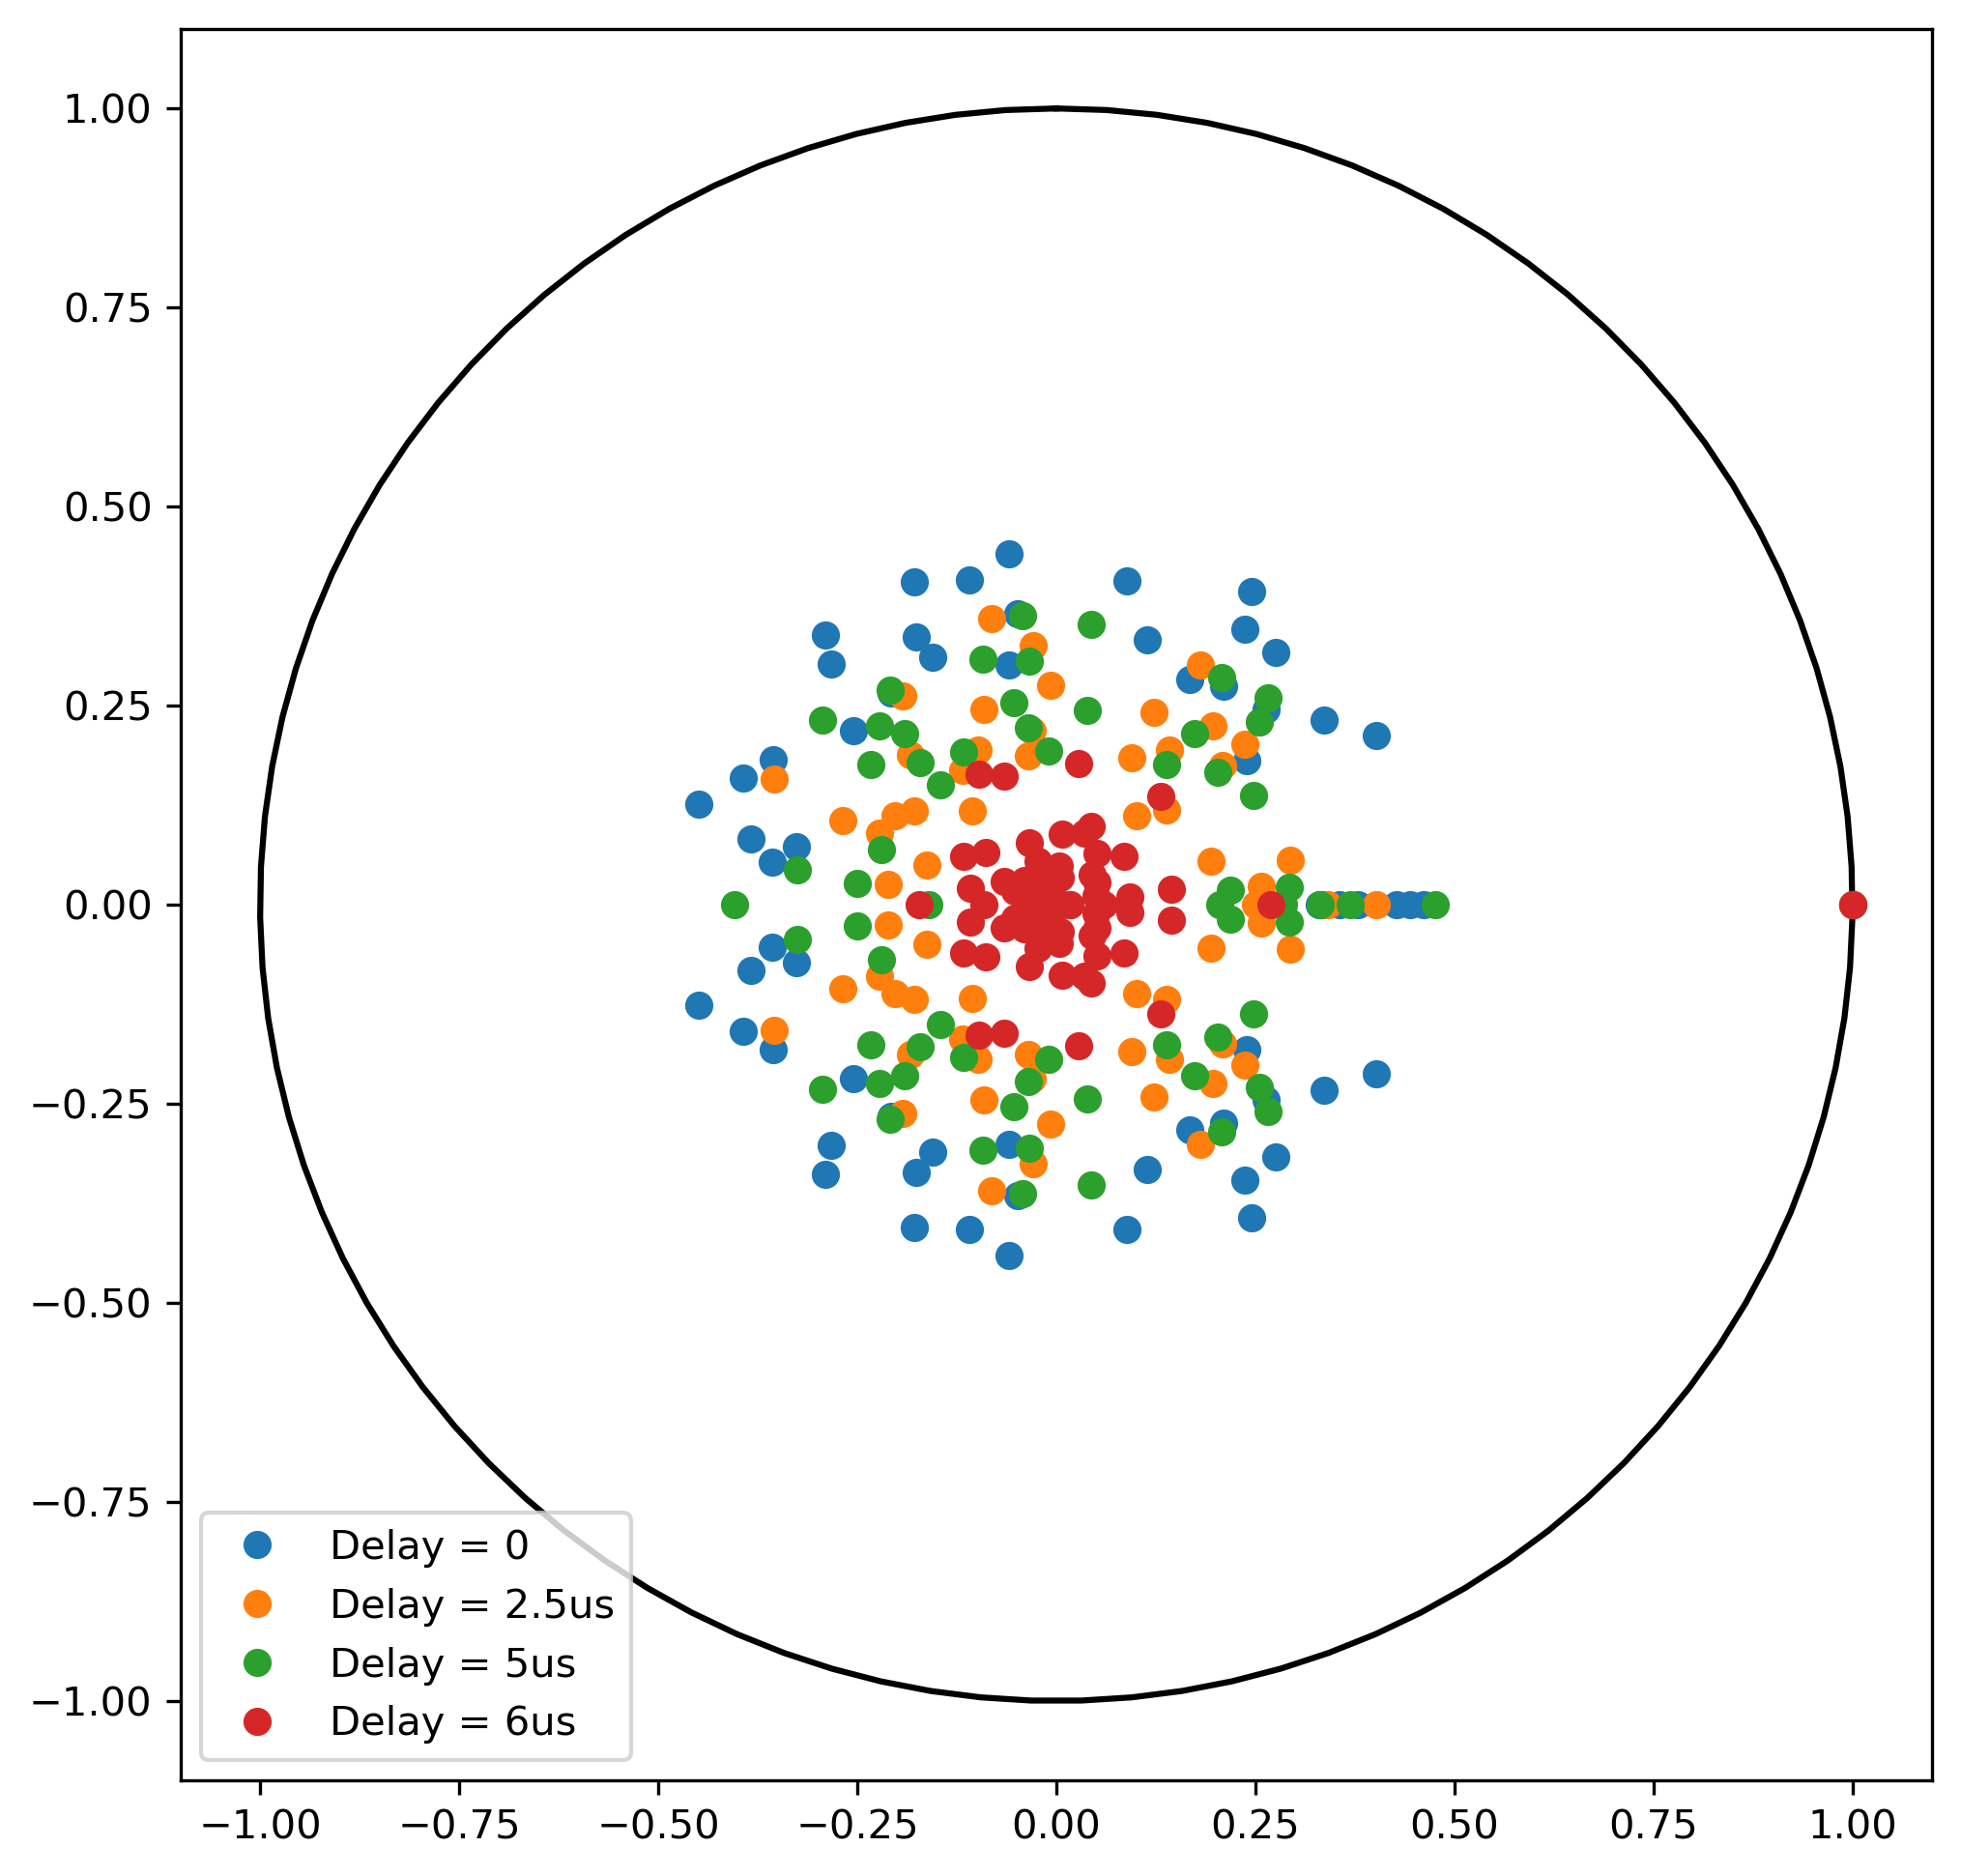

In [10]:
circle = np.array(circle)

fig =plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

#plt.plot(spectrum1[:,0], spectrum1[:,1], "o")
#plt.plot(spectrum2[:,0], spectrum2[:,1], "o")
plt.plot(spectrum3[:,0], spectrum3[:,1], "o")
plt.plot(spectrum4[:,0], spectrum4[:,1], "o")
plt.plot(spectrum5[:,0], spectrum5[:,1], "o")
#plt.plot(spectrum6[:,0], spectrum6[:,1], "o")
#plt.plot(spectrum7[:,0], spectrum7[:,1], "o")
plt.plot(spectrum8[:,0], spectrum8[:,1], "o")


plt.legend(["_", "Delay = 0", "Delay = 2.5us", "Delay = 5us", "Delay = 6us", "Delay = 7us","Delay = 10us"])
plt.show()

In [13]:
rank_eff_list = [effective_rank(model1.channel), effective_rank(model2.channel), effective_rank(model3.channel), effective_rank(model4.channel)]

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
plt.plot([0, 2.5, 5, 10], rank_eff_list, "o-")
plt.xlabel("Delay in mu seconds")
plt.ylabel("Effective Rank")
plt.show()

NameError: name 'model1' is not defined

In [11]:
def spectrum_to_radial(spectrum):
    radial = tf.norm(spectrum, axis=1)
    return radial

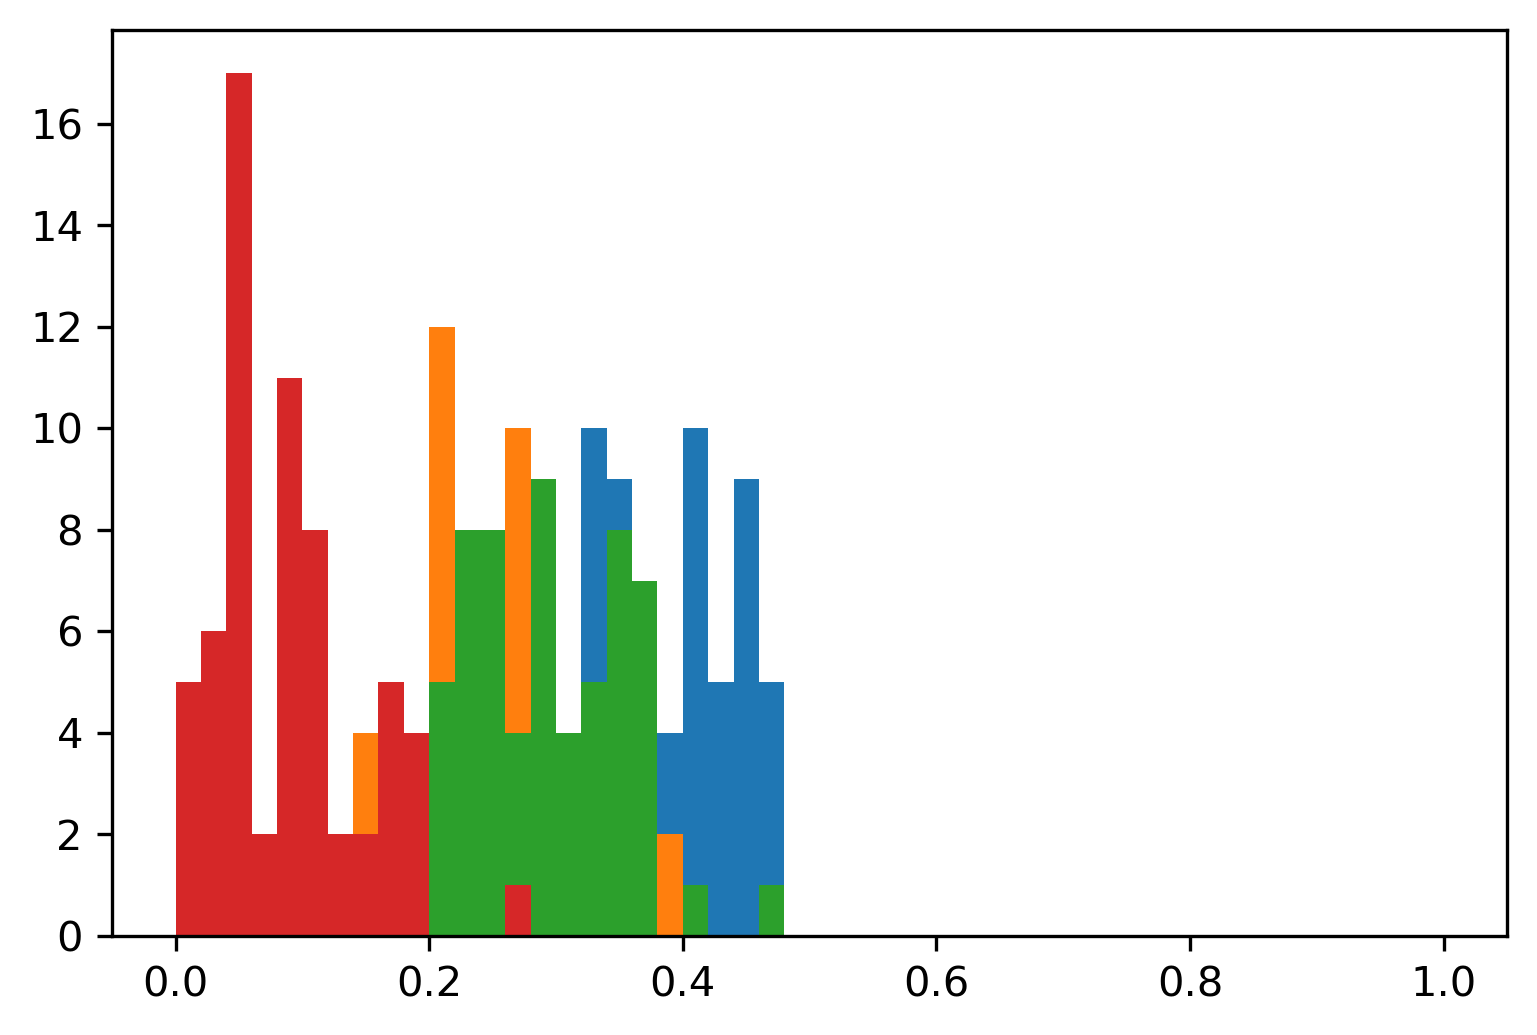

In [12]:
bins = np.linspace(0, 1, 51)

fig=plt.figure(dpi = 300, facecolor='w', edgecolor='k')
hist1 = plt.hist(spectrum_to_radial(spectrum3[:-1]), bins=bins)
hist2 = plt.hist(spectrum_to_radial(spectrum4[:-1]), bins=bins)
hist3 = plt.hist(spectrum_to_radial(spectrum5[:-1]), bins=bins)
hist4 = plt.hist(spectrum_to_radial(spectrum8[:-1]), bins=bins)
plt.show()

In [36]:
#print(hist1)
mask = np.where(hist1[0] != 0)
print(bins[mask])

[0.74 0.76 0.78 0.8 ]


In [37]:
#print(hist1)
mask = np.where(hist2[0] != 0)
print(bins[mask])

[0.56 0.58 0.6  0.62 0.64 0.66 0.68]


In [38]:
#print(hist1)
mask = np.where(hist3[0] != 0)
print(bins[mask])

[0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46]


In [39]:
#print(hist1)
mask = np.where(hist4[0] != 0)
print(bins[mask])

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.26]
